### GUO PEIHONG
### Task3


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import cv2

In [81]:
labels = pd.read_csv("/content/drive/MyDrive/BS6204&08/HW4labels.csv")

In [82]:
labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [34]:
df = pd.read_csv('/content/drive/MyDrive/BS6204&08/HW4data.csv')
df

,Unnamed: 0,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,...,sample_791,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800
0,?|100130426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.436588,0.000000,0.000000,0.000000,0.000000,0.000000
1,?|100133144,2.017209,0.592732,3.511759,3.663618,2.655741,3.467853,1.224966,2.854853,3.992125,...,3.080061,4.337404,2.068224,4.288388,4.472176,1.865642,3.942955,3.249582,2.590339,2.325242
2,?|100134869,3.265527,1.588421,4.327199,4.507649,2.821547,3.581918,1.691177,1.750478,2.772730,...,2.815739,2.597126,0.857663,3.452490,4.908746,2.718197,4.453807,3.707492,2.787976,3.805932
3,?|10357,5.478487,7.586157,6.881787,6.659068,6.539454,6.620243,6.572007,7.226720,6.546692,...,6.209617,6.070379,6.218739,7.209151,5.937848,7.350099,6.346597,8.185901,7.318624,6.530246
4,?|10431,10.431999,9.623011,9.870730,10.196184,9.738265,9.706829,9.640511,9.758691,10.488252,...,9.644469,9.863990,10.623068,9.875620,9.330901,10.006003,10.056868,9.504082,9.987136,9.560367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYX|7791,12.003135,12.674552,9.045255,11.392682,11.922439,11.556995,13.256060,12.670377,12.498919,...,11.035335,10.864960,10.703722,10.790014,10.961247,12.031267,11.633422,12.180944,11.198279,11.641081
20527,ZZEF1|23140,9.650743,10.517059,9.788359,9.694814,9.217749,9.244150,9.664486,9.987733,10.389954,...,11.030377,9.617853,9.144204,10.698991,10.203226,9.813063,10.317266,10.681194,10.335513,10.607358
20528,ZZZ3|26009,8.921326,9.397854,10.090470,9.684365,9.461191,9.836473,9.244219,9.216872,10.390255,...,10.119304,12.813320,9.682057,10.081523,10.030005,10.092770,8.745983,9.466711,10.400581,9.844794
20529,psiTPTE22|387590,5.286759,2.094168,1.683023,3.292001,5.110372,5.355133,8.330912,6.551490,7.828321,...,7.313500,3.805261,5.384968,4.376693,3.675703,8.819269,9.659081,4.677458,5.718751,4.550716


In [35]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [36]:
df = df.T

In [37]:
df

,0,1,2,3,4,5,6,7,8,9,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [38]:
pca = PCA(n_components=3, random_state=0)
df_pca = pca.fit_transform(df)
df_pca

array([[-62.75541522, -94.07197346,  89.51983107],
       [ -2.43289636,  90.58584185,  -1.06730792],
       [-71.26685285,  -8.06460774,  66.11245489],
       ...,
       [ 10.48626145,  21.57059456,  41.34587838],
       [-55.06360486, -92.39477804,  80.05003932],
       [-49.10303379, -50.9976391 ,  40.50375422]])

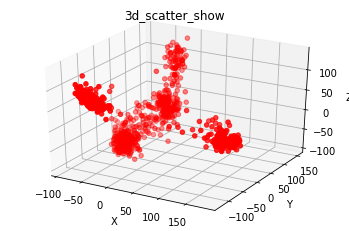

In [39]:
# plt.title("Scatter Plot of the 801 samples")
# plt.scatter(df_pca[:, 0], df_pca[:, 1])
# plt.show()
x = df_pca[:, 0]
y = df_pca[:, 1]
z = df_pca[:, 2]

ax = plt.subplot(projection = '3d')  
ax.set_title('3d_scatter_show')  
ax.scatter(x, y, z, c = 'r')   
 
ax.set_xlabel('X') 
ax.set_ylabel('Y')  
ax.set_zlabel('Z')  
 
plt.show()

In [40]:
color = list(labels['Class'])
c = {'PRAD':0, 'LUAD':1, 'BRCA':2, 'KIRC':3, 'COAD':4}
for i in range(len(color)):
    color[i] = c[color[i]]

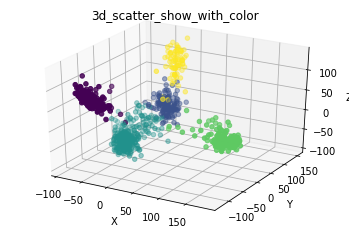

In [41]:
x = df_pca[:, 0]
y = df_pca[:, 1]
z = df_pca[:, 2]
ax = plt.subplot(projection = '3d')  
ax.set_title('3d_scatter_show_with_color')  
ax.scatter(x, y, z, c = color)   
 
ax.set_xlabel('X')  
ax.set_ylabel('Y')  
ax.set_zlabel('Z')  
 
plt.show()

### task4

In [42]:
df = df.T

In [43]:
df

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_791,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.436588,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.017209,0.592732,3.511759,3.663618,2.655741,3.467853,1.224966,2.854853,3.992125,3.642494,...,3.080061,4.337404,2.068224,4.288388,4.472176,1.865642,3.942955,3.249582,2.590339,2.325242
2,3.265527,1.588421,4.327199,4.507649,2.821547,3.581918,1.691177,1.750478,2.772730,4.423558,...,2.815739,2.597126,0.857663,3.452490,4.908746,2.718197,4.453807,3.707492,2.787976,3.805932
3,5.478487,7.586157,6.881787,6.659068,6.539454,6.620243,6.572007,7.226720,6.546692,6.849511,...,6.209617,6.070379,6.218739,7.209151,5.937848,7.350099,6.346597,8.185901,7.318624,6.530246
4,10.431999,9.623011,9.870730,10.196184,9.738265,9.706829,9.640511,9.758691,10.488252,9.464466,...,9.644469,9.863990,10.623068,9.875620,9.330901,10.006003,10.056868,9.504082,9.987136,9.560367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,12.003135,12.674552,9.045255,11.392682,11.922439,11.556995,13.256060,12.670377,12.498919,11.144295,...,11.035335,10.864960,10.703722,10.790014,10.961247,12.031267,11.633422,12.180944,11.198279,11.641081
20527,9.650743,10.517059,9.788359,9.694814,9.217749,9.244150,9.664486,9.987733,10.389954,9.244851,...,11.030377,9.617853,9.144204,10.698991,10.203226,9.813063,10.317266,10.681194,10.335513,10.607358
20528,8.921326,9.397854,10.090470,9.684365,9.461191,9.836473,9.244219,9.216872,10.390255,9.484299,...,10.119304,12.813320,9.682057,10.081523,10.030005,10.092770,8.745983,9.466711,10.400581,9.844794
20529,5.286759,2.094168,1.683023,3.292001,5.110372,5.355133,8.330912,6.551490,7.828321,4.759151,...,7.313500,3.805261,5.384968,4.376693,3.675703,8.819269,9.659081,4.677458,5.718751,4.550716


In [44]:
# calculate the variance for each row(gene)
df['var'] = 0.0
for i in range(len(df)):
    df['var'][i] = np.var(df.iloc[i])

In [45]:
df

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800,var
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.436588,0.000000,0.000000,0.000000,0.000000,0.000000,0.018682
1,2.017209,0.592732,3.511759,3.663618,2.655741,3.467853,1.224966,2.854853,3.992125,3.642494,...,4.337404,2.068224,4.288388,4.472176,1.865642,3.942955,3.249582,2.590339,2.325242,1.449680
2,3.265527,1.588421,4.327199,4.507649,2.821547,3.581918,1.691177,1.750478,2.772730,4.423558,...,2.597126,0.857663,3.452490,4.908746,2.718197,4.453807,3.707492,2.787976,3.805932,1.144606
3,5.478487,7.586157,6.881787,6.659068,6.539454,6.620243,6.572007,7.226720,6.546692,6.849511,...,6.070379,6.218739,7.209151,5.937848,7.350099,6.346597,8.185901,7.318624,6.530246,0.463347
4,10.431999,9.623011,9.870730,10.196184,9.738265,9.706829,9.640511,9.758691,10.488252,9.464466,...,9.863990,10.623068,9.875620,9.330901,10.006003,10.056868,9.504082,9.987136,9.560367,0.375874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,12.003135,12.674552,9.045255,11.392682,11.922439,11.556995,13.256060,12.670377,12.498919,11.144295,...,10.864960,10.703722,10.790014,10.961247,12.031267,11.633422,12.180944,11.198279,11.641081,0.619982
20527,9.650743,10.517059,9.788359,9.694814,9.217749,9.244150,9.664486,9.987733,10.389954,9.244851,...,9.617853,9.144204,10.698991,10.203226,9.813063,10.317266,10.681194,10.335513,10.607358,0.464650
20528,8.921326,9.397854,10.090470,9.684365,9.461191,9.836473,9.244219,9.216872,10.390255,9.484299,...,12.813320,9.682057,10.081523,10.030005,10.092770,8.745983,9.466711,10.400581,9.844794,0.431681
20529,5.286759,2.094168,1.683023,3.292001,5.110372,5.355133,8.330912,6.551490,7.828321,4.759151,...,3.805261,5.384968,4.376693,3.675703,8.819269,9.659081,4.677458,5.718751,4.550716,4.328224


In [46]:
# look for the best cutoff

Try diffrent cutoffs from 1-10, and then use pca(n=2) to allow for visualization

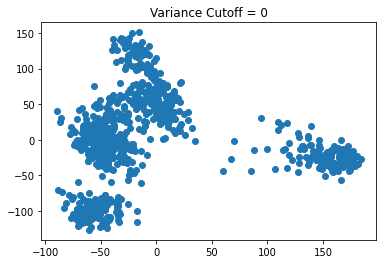

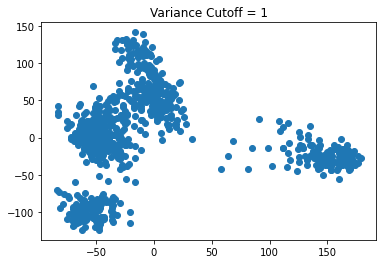

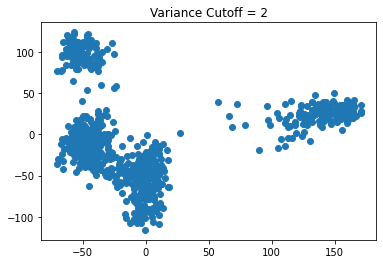

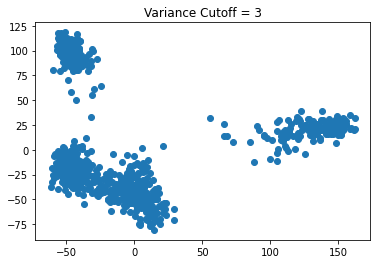

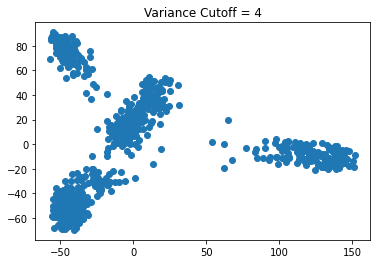

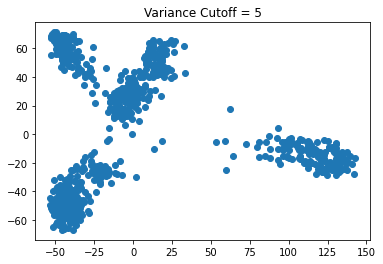

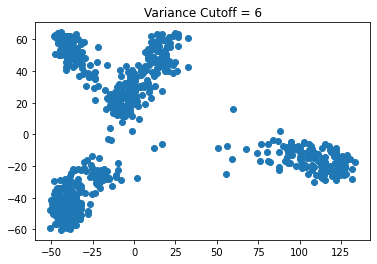

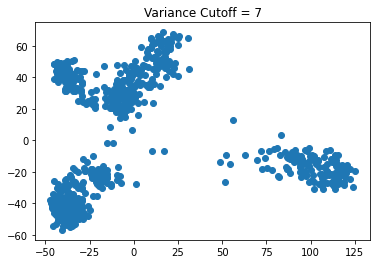

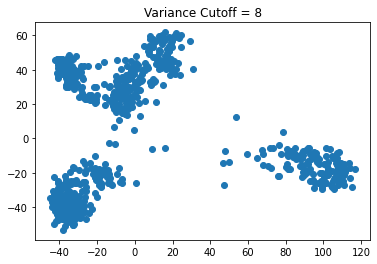

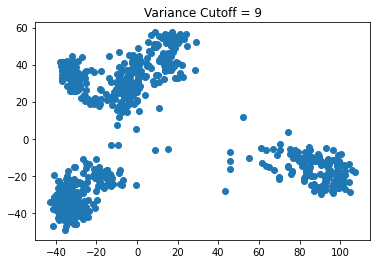

In [47]:
pca = PCA(n_components=2, random_state=0)
for i in range(10):
  df_cut = df[df['var'] > i]
  df_cut = df_cut.drop(['var'],axis=1)
  df_cut = df_cut.T
  df_pca = pca.fit_transform(df_cut)
  plt.title(f"Variance Cutoff = {i}")
  plt.scatter(df_pca[:, 0], df_pca[:, 1])
  plt.show()

So, we can set cutofff = 5

In [48]:
df = df[df['var'] > 5]
df.drop(['var'],axis=1, inplace=True)
df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_791,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800
18,0.591871,0.000000,1.683023,1.267356,0.889707,0.894294,9.466878,0.000000,0.635336,0.000000,...,0.000000,3.284988,0.789354,0.416948,6.541532,0.496922,0.000000,1.002595,0.000000,0.000000
21,0.000000,0.000000,3.660427,0.000000,0.000000,4.002901,0.000000,0.000000,4.773828,5.784391,...,7.781347,6.612022,3.216564,4.574931,6.688964,1.955573,0.000000,5.179822,0.000000,4.709103
26,7.215116,9.949812,6.096650,3.913761,1.942120,0.894294,0.000000,5.145527,6.080374,0.724214,...,1.887330,0.645517,1.496104,2.228542,2.041944,0.000000,9.169589,1.325099,3.450934,3.485246
30,0.000000,0.000000,0.000000,0.000000,0.000000,4.936704,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.831738,0.581881,0.748375
33,4.747656,1.327170,0.000000,7.742714,2.612801,2.002018,0.000000,5.145527,9.464329,0.000000,...,0.378401,0.884793,2.424922,3.176897,3.272173,0.865919,2.245891,5.574986,2.451778,10.319525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,8.463385,2.651224,6.512243,5.397782,8.631930,4.742119,6.501632,2.751185,3.453978,3.340277,...,8.111892,8.652935,8.860926,3.976959,7.625212,8.877195,4.091090,5.380151,5.873454,7.794221
20125,7.118380,6.915593,4.683084,10.435608,3.414853,9.666236,3.654390,9.595226,3.340363,10.144097,...,4.357278,1.703677,2.771188,11.507017,6.224808,4.561815,6.658211,5.559718,7.056811,3.933393
20389,7.360224,2.814879,4.306933,7.728424,6.171291,1.442280,2.191152,1.655260,9.076458,5.203976,...,7.592173,8.225217,8.115834,5.456116,6.823329,6.114061,7.789997,6.559773,5.810998,4.709103
20476,9.175285,0.000000,8.834108,7.529188,7.647883,8.262753,9.210959,7.867483,6.718197,9.025951,...,6.775814,6.477284,8.330155,6.610541,7.064322,8.486940,8.207756,8.089895,7.605413,8.148944


So, N = 1621

### Task5

In [49]:
df = df.T

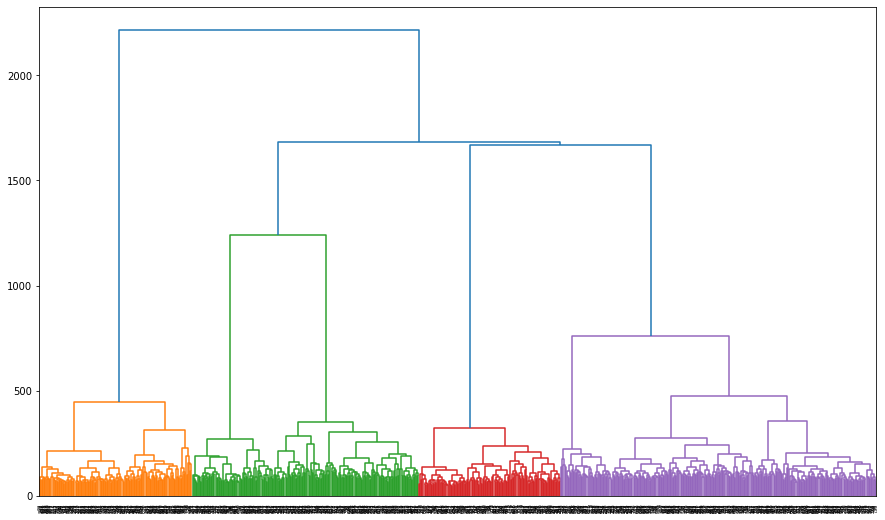

In [50]:
dist = sch.distance.pdist(X=df, metric='euclidean')
Z = sch.linkage(dist, method='ward')
plt.figure(figsize=(15,9))
plt.xticks(rotation=90)
P = sch.dendrogram(Z)

In [51]:
Z.shape

(800, 4)

In [76]:
sns.color_palette("rainbow",5)

[(0.17058823529411765, 0.4946558433997788, 0.9667184042691874),
 (0.16666666666666663, 0.8660254037844386, 0.8660254037844387),
 (0.503921568627451, 0.9999810273487268, 0.7049255469061472),
 (0.8333333333333333, 0.8660254037844387, 0.5000000000000001),
 (1.0, 0.4946558433997788, 0.2558427775944356)]

In [66]:
labels['Class'].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

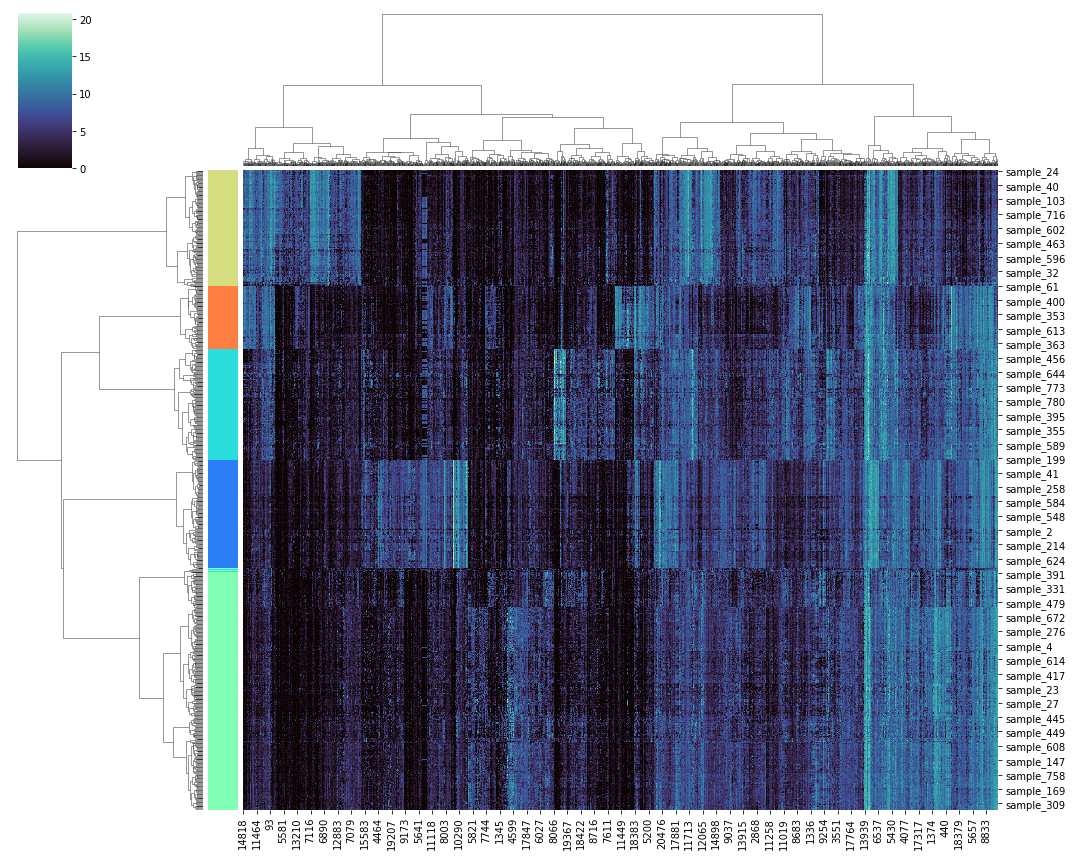

In [65]:
row_c = dict(zip(labels['Class'].unique(),sns.color_palette("rainbow",5)))
hm = sns.clustermap(df, method='ward',metric='euclidean',cmap='mako',row_colors=labels['Class'].map(row_c).to_numpy(),figsize=(15,12))

In [67]:
row_c

{'PRAD': (0.17058823529411765, 0.4946558433997788, 0.9667184042691874),
 'LUAD': (0.16666666666666663, 0.8660254037844386, 0.8660254037844387),
 'BRCA': (0.503921568627451, 0.9999810273487268, 0.7049255469061472),
 'KIRC': (0.8333333333333333, 0.8660254037844387, 0.5000000000000001),
 'COAD': (1.0, 0.4946558433997788, 0.2558427775944356)}

In [77]:
print(sns.color_palette("rainbow",5))

[(0.17058823529411765, 0.4946558433997788, 0.9667184042691874), (0.16666666666666663, 0.8660254037844386, 0.8660254037844387), (0.503921568627451, 0.9999810273487268, 0.7049255469061472), (0.8333333333333333, 0.8660254037844387, 0.5000000000000001), (1.0, 0.4946558433997788, 0.2558427775944356)]


### PRAD:蓝
### LUAD:淡蓝
### BRCA:亮绿
### KIRC:暗绿
### COAD:橘

### task7

In [78]:
df

,18,21,26,30,33,61,62,67,71,83,...,19914,19921,19922,19925,19937,19948,20125,20389,20476,20524
sample_0,0.591871,0.000000,7.215116,0.000000,4.747656,1.010279,0.000000,3.478079,7.377931,10.796510,...,11.919474,1.010279,1.598651,0.000000,3.478079,8.463385,7.118380,7.360224,9.175285,7.220030
sample_1,0.000000,0.000000,9.949812,0.000000,1.327170,3.499846,3.866146,8.605872,4.312113,2.176738,...,4.095722,6.656145,5.275331,1.327170,0.000000,2.651224,6.915593,2.814879,0.000000,6.256586
sample_2,1.683023,3.660427,6.096650,0.000000,0.000000,1.683023,0.452595,2.533663,1.683023,2.785739,...,9.526732,0.000000,1.839758,0.000000,0.796598,6.512243,4.683084,4.306933,8.834108,5.401607
sample_3,1.267356,0.000000,3.913761,0.000000,7.742714,1.637239,0.000000,1.464093,4.949633,9.634793,...,11.807347,0.000000,6.135506,5.934425,1.931418,5.397782,10.435608,7.728424,7.529188,8.942805
sample_4,0.889707,0.000000,1.942120,0.000000,2.612801,8.930616,1.711142,4.778072,5.133921,10.337165,...,11.542147,2.544139,4.461804,1.435949,5.122192,8.631930,3.414853,6.171291,7.647883,7.181162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.496922,1.955573,0.000000,0.000000,0.865919,4.814632,0.000000,1.955573,6.448896,7.281930,...,11.590989,3.905158,0.000000,0.000000,1.955573,8.877195,4.561815,6.114061,8.486940,4.484415
sample_797,0.000000,0.000000,9.169589,0.000000,2.245891,8.140998,4.377547,4.449931,4.301339,2.666211,...,8.264053,0.000000,0.000000,0.000000,7.768925,4.091090,6.658211,7.789997,8.207756,6.555327
sample_798,1.002595,5.179822,1.325099,6.831738,5.574986,6.103195,2.589332,3.759742,7.185113,1.002595,...,5.431382,3.252612,9.915126,8.884812,4.619736,5.380151,5.559718,6.559773,8.089895,3.589763
sample_799,0.000000,0.000000,3.450934,0.581881,2.451778,0.581881,1.578746,1.578746,8.545266,1.316320,...,10.586380,0.000000,4.035615,0.000000,4.605743,5.873454,7.056811,5.810998,7.605413,4.745888


In [79]:
labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [92]:
rows = []
for i in range(len(labels)):
  if labels['Class'][i] != 'BRCA':
    rows.append(i)
rows

[0,
 1,
 2,
 3,
 5,
 6,
 7,
 9,
 11,
 12,
 16,
 17,
 18,
 19,
 21,
 22,
 24,
 25,
 26,
 32,
 34,
 36,
 37,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 49,
 51,
 53,
 54,
 57,
 58,
 60,
 61,
 63,
 64,
 65,
 67,
 68,
 70,
 73,
 75,
 77,
 78,
 79,
 81,
 84,
 85,
 88,
 90,
 91,
 95,
 96,
 98,
 101,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 115,
 116,
 117,
 120,
 121,
 122,
 124,
 125,
 126,
 128,
 129,
 130,
 132,
 135,
 136,
 138,
 139,
 141,
 143,
 144,
 145,
 146,
 148,
 149,
 150,
 151,
 154,
 157,
 158,
 159,
 160,
 161,
 162,
 164,
 165,
 166,
 167,
 168,
 170,
 171,
 173,
 177,
 179,
 180,
 181,
 183,
 184,
 185,
 186,
 187,
 189,
 190,
 191,
 192,
 193,
 194,
 198,
 199,
 201,
 202,
 203,
 204,
 205,
 207,
 209,
 210,
 212,
 214,
 218,
 220,
 221,
 222,
 223,
 224,
 226,
 227,
 229,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 249,
 251,
 252,
 254,
 255,
 256,
 257,
 258,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 269,
 270

In [98]:
rows_new = []
for i in range(len(rows)):
  a = 'sample_' + str(rows[i])
  rows_new.append(a)
rows_new

['sample_0',
 'sample_1',
 'sample_2',
 'sample_3',
 'sample_5',
 'sample_6',
 'sample_7',
 'sample_9',
 'sample_11',
 'sample_12',
 'sample_16',
 'sample_17',
 'sample_18',
 'sample_19',
 'sample_21',
 'sample_22',
 'sample_24',
 'sample_25',
 'sample_26',
 'sample_32',
 'sample_34',
 'sample_36',
 'sample_37',
 'sample_40',
 'sample_41',
 'sample_42',
 'sample_43',
 'sample_44',
 'sample_46',
 'sample_47',
 'sample_49',
 'sample_51',
 'sample_53',
 'sample_54',
 'sample_57',
 'sample_58',
 'sample_60',
 'sample_61',
 'sample_63',
 'sample_64',
 'sample_65',
 'sample_67',
 'sample_68',
 'sample_70',
 'sample_73',
 'sample_75',
 'sample_77',
 'sample_78',
 'sample_79',
 'sample_81',
 'sample_84',
 'sample_85',
 'sample_88',
 'sample_90',
 'sample_91',
 'sample_95',
 'sample_96',
 'sample_98',
 'sample_101',
 'sample_103',
 'sample_104',
 'sample_105',
 'sample_106',
 'sample_107',
 'sample_108',
 'sample_109',
 'sample_110',
 'sample_112',
 'sample_113',
 'sample_115',
 'sample_116',
 

In [93]:
df_new = df

In [99]:
df_new.drop(index=rows_new, inplace=True)

In [100]:
df_new

,18,21,26,30,33,61,62,67,71,83,...,19914,19921,19922,19925,19937,19948,20125,20389,20476,20524
sample_4,0.889707,0.000000,1.942120,0.0,2.612801,8.930616,1.711142,4.778072,5.133921,10.337165,...,11.542147,2.544139,4.461804,1.435949,5.122192,8.631930,3.414853,6.171291,7.647883,7.181162
sample_8,0.635336,4.773828,6.080374,0.0,9.464329,6.919519,4.091217,9.944725,4.091217,0.352307,...,4.740177,7.183864,0.352307,0.000000,1.252839,3.453978,3.340363,9.076458,6.718197,7.933278
sample_10,1.651683,0.000000,3.920036,0.0,2.146395,3.960299,2.279650,5.140464,6.295374,11.120879,...,10.882735,7.136068,8.013859,5.846726,4.180792,8.727356,7.450650,6.828708,8.612246,6.580103
sample_13,0.000000,0.000000,1.413648,0.0,0.000000,0.000000,0.000000,3.012980,3.839204,1.805746,...,12.886872,1.967943,3.343749,5.610047,1.168642,9.457865,0.000000,7.450345,10.063274,7.195800
sample_14,0.000000,4.240459,0.441483,0.0,0.000000,1.052485,0.779134,2.304044,3.553496,3.028711,...,11.152494,0.000000,2.896214,0.000000,3.553496,9.822988,3.314827,4.723597,6.883596,6.588536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_790,0.000000,1.989757,3.576957,0.0,4.927731,4.601037,0.000000,3.471513,2.596053,6.606436,...,9.649391,1.816845,1.085017,0.000000,7.416933,6.196326,2.215523,6.425347,7.138456,5.017873
sample_791,0.000000,7.781347,1.887330,0.0,0.378401,6.783692,0.677982,4.153530,1.765323,9.967226,...,11.621718,2.981597,0.000000,0.000000,1.887330,8.111892,4.357278,7.592173,6.775814,6.183600
sample_792,3.284988,6.612022,0.645517,0.0,0.884793,4.394644,0.000000,2.036996,6.143549,6.934658,...,10.183251,0.645517,0.358621,0.645517,1.429214,8.652935,1.703677,8.225217,6.477284,5.686727
sample_793,0.789354,3.216564,1.496104,0.0,2.424922,6.423758,0.000000,4.058239,4.997929,11.231299,...,11.572255,1.671293,1.827494,0.000000,1.065228,8.860926,2.771188,8.115834,8.330155,4.997929


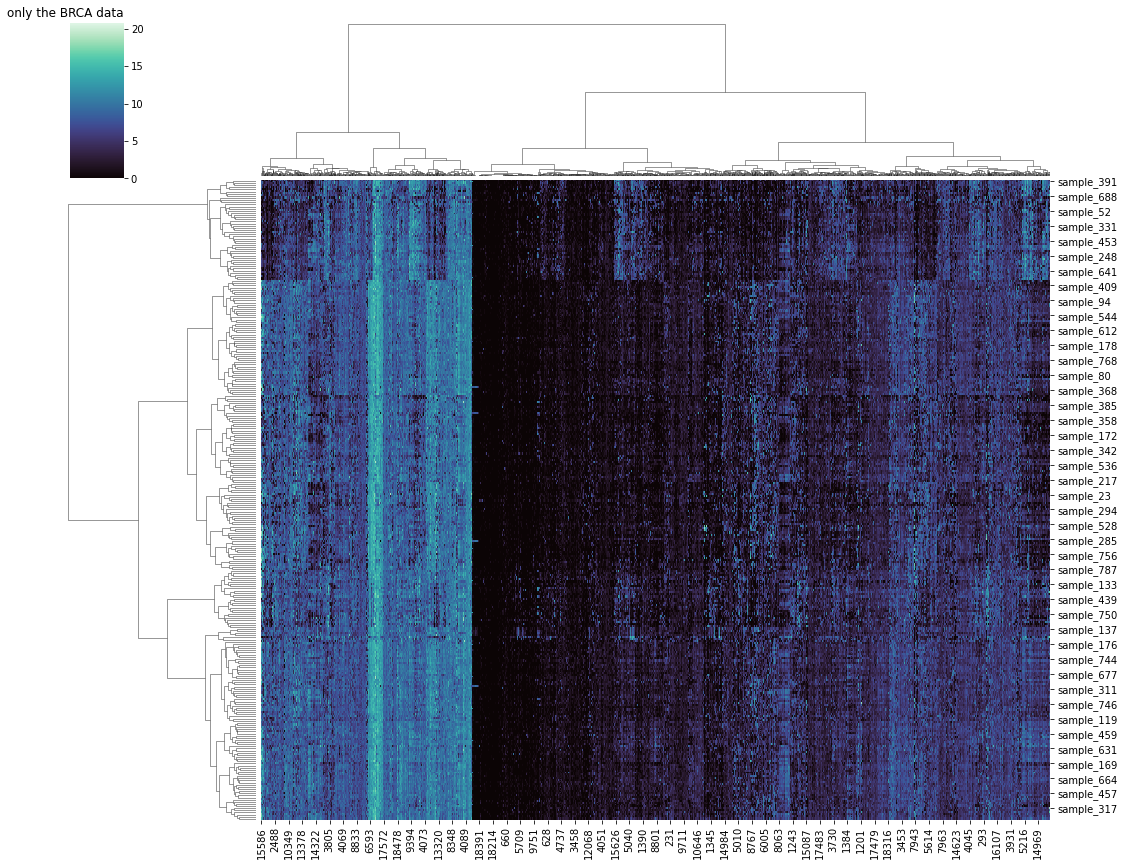

In [105]:
hm1 = sns.clustermap(df, method='ward',metric='euclidean',cmap='mako',figsize=(15,12))
plt.title('only the BRCA data', loc='right')
plt.show()